In [9]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# 从Excel文件中读取数据
values_df = pd.read_excel("value for 100 items.xlsx", header=None)
weights_df = pd.read_excel("weight for ten constraints.xlsx", header=None)
capacities_df = pd.read_excel("capacity for ten constraints.xlsx", header=None)

# 将数据转换为列表
item_values = values_df.values.flatten().tolist()
item_weights = weights_df.values.tolist()
capacities = capacities_df.values.flatten().tolist()
# print(len(item_weights[1]))


num_items = len(item_values)
num_constraints = len(item_weights[0])




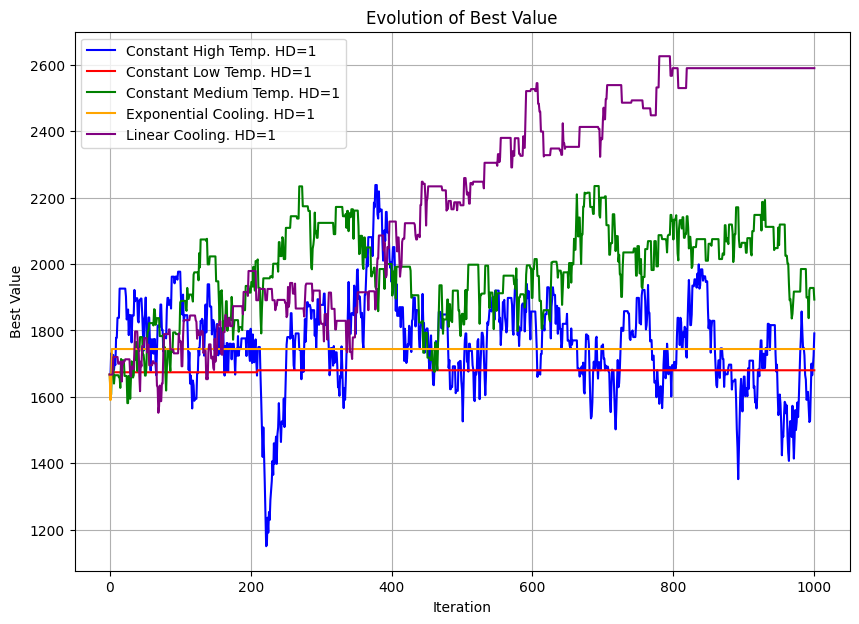

In [10]:
# 示例目标函数：计算解的价值
def evaluate_solution(solution):
    total_value = sum(item_values[i] for i in range(num_items) if solution[i] == 1)
    return total_value


# 示例约束函数：检查解是否满足约束条件
def is_feasible(solution):
    for j in range(num_constraints):
        total_weight = sum(item_weights[i][j] for i in range(num_items) if solution[i] == 1)
        if total_weight > capacities[j]:
            return False
    return True


# 生成邻居解
def generate_neighbor(solution, distance):
    neighbor = solution[:].copy()  # 复制解
    # print(neighbor)
    for _ in range(distance):
        index = random.randint(0, len(solution) - 1)
        neighbor[index] = 1 - neighbor[index]  # 翻转该位置的值
    # 确保邻居解满足约束条件
    # while not is_feasible(neighbor):
    #     index = random.randint(0, len(solution) - 1)
    #     neighbor[index] = 1 - neighbor[index]  # 再次翻转该位置的值
    if is_feasible(neighbor):
        return neighbor
    return solution


# 模拟退火算法
def simulated_annealing(initial_solution, max_evaluations, initial_temperature, cooling_schedule, distance=1):
    current_solution = initial_solution
    current_value = evaluate_solution(current_solution)
    best_solution = current_solution
    best_value = current_value
    temperature = initial_temperature
    evaluations = 0
    best_values = [best_value]

    while evaluations < max_evaluations:
        neighbor_distance = distance  # 邻居距离
        neighbor_solution = generate_neighbor(current_solution, neighbor_distance)

        if is_feasible(neighbor_solution):
            neighbor_value = evaluate_solution(neighbor_solution)
            delta = neighbor_value - current_value
            if delta > 0 or random.random() < math.exp(delta / temperature):
                current_solution = neighbor_solution
                current_value = neighbor_value
                best_solution = current_solution
                best_value = current_value
        best_values.append(best_value)          
        temperature = cooling_schedule(temperature)
        evaluations += 1
        # print("Iteration {}: Best Value = {}".format(evaluations, best_value))

    return best_solution, best_value, best_values

# 示例冷却计划：线性降温
def linear_cooling(current_temperature):
    return current_temperature - initial_temperature / max_evaluations


# 示例冷却计划：指数降温
def exponential_cooling(current_temperature):
    alpha = 0.7  # 衰减率
    return current_temperature * alpha


# 示例冷却计划：恒定高温
def constant_high_temperature(current_temperature):
    return 10000.0


# 示例冷却计划：恒定低温
def constant_low_temperature(current_temperature):
    return 0.1


# 示例冷却计划：恒定中温
def constant_medium_temperature(current_temperature):
    return 100.0


# 初始化
initial_solution = [1 if i < 37 else 0 for i in range(num_items)]  # 初始解，所有物品都未被选中
max_evaluations = 1000
initial_temperature = 100.0

dis = 1

# 调用模拟退火算法并输出结果
best_solution_high, best_value_high, best_values_high = simulated_annealing(initial_solution, max_evaluations, 10000.0, constant_high_temperature,dis)
best_solution_low, best_value_low, best_values_low = simulated_annealing(initial_solution, max_evaluations, 1.0, constant_low_temperature,dis)
best_solution_medium, best_value_medium, best_values_medium = simulated_annealing(initial_solution, max_evaluations, 100.0, constant_medium_temperature,dis)
best_solution_exp, best_value_exp, best_values_exp = simulated_annealing(initial_solution, max_evaluations, initial_temperature, exponential_cooling,dis)
best_solution_lin, best_value_lin, best_values_lin = simulated_annealing(initial_solution, max_evaluations, initial_temperature, linear_cooling,dis)

# 绘制演化过程图表
plt.plot(best_values_high, label='Constant High Temp. HD=1', linestyle='-', color='blue')
plt.plot(best_values_low, label='Constant Low Temp. HD=1', linestyle='-', color='red')
plt.plot(best_values_medium, label='Constant Medium Temp. HD=1', linestyle='-', color='green')
plt.plot(best_values_exp, label='Exponential Cooling. HD=1', linestyle='-', color='orange')
plt.plot(best_values_lin, label='Linear Cooling. HD=1', linestyle='-', color='purple')

plt.title('Evolution of Best Value')
plt.xlabel('Iteration')
plt.ylabel('Best Value')
plt.legend()
plt.rcParams["figure.figsize"] = (10,7)  # 设置图像大小
plt.grid(True)
plt.show()
